# Epoch Evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from csv file with metrics from ARVAE trained model 

dataset = pd.read_csv("/home/rfernandes/projeto/epoch_evaluation/allergy_arvae.csv")
#dataset2 = pd.read_csv("/home/rfernandes/projeto/epoch_evaluation/arvae.csv")

In [3]:
dataset

,epoch,aa_acc,acc,kl_loss,loss,vae_loss,val_aa_acc,val_acc,val_kl_loss,val_loss,val_vae_loss,val_xent_loss,xent_loss
0,0,0.102195,0.532987,12.061175,780.234447,780.234447,0.116724,0.538287,0.216611,753.880458,753.880458,753.663843,768.173271
1,1,0.115362,0.541089,0.405620,749.627213,749.627213,0.117820,0.541726,0.567230,746.441425,746.441425,745.874193,749.221595
2,2,0.117324,0.542331,0.661295,746.359470,746.359470,0.121916,0.541786,0.646227,747.511058,747.511058,746.864830,745.698174
3,3,0.119324,0.543614,0.857974,744.544349,744.544349,0.123922,0.541279,0.848596,747.864984,747.864984,747.016389,743.686376
4,4,0.120476,0.544370,1.044910,743.063231,743.063231,0.125926,0.543601,1.179085,744.799596,744.799596,743.620506,742.018315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.209707,0.591605,3.504500,670.135807,670.135807,0.203557,0.583999,3.424242,683.895268,683.895268,680.471029,666.631306
96,96,0.210392,0.591812,3.558047,669.824394,669.824394,0.206745,0.586571,3.155664,680.611426,680.611426,677.455764,666.266348
97,97,0.210682,0.591994,3.538906,669.457248,669.457248,0.205186,0.586639,3.411629,679.777277,679.777277,676.365650,665.918344
98,98,0.211406,0.592276,3.494814,668.930128,668.930128,0.204960,0.585144,3.323804,681.721294,681.721294,678.397493,665.435315


In [4]:
#Verify the epoch with the best validation loss

val_loss = dataset['val_loss']
best_epoch = val_loss.sort_values()
best_epoch = best_epoch.index[0
                              ]
best_epoch


82

In [17]:
# Have a better view of the vlaidation loss data

val_loss.sort_values()

82    677.446718
64    677.799162
80    677.946381
90    678.185301
99    678.968159
         ...    
7     745.641941
1     746.441425
2     747.511058
3     747.864984
0     753.880458
Name: val_loss, Length: 100, dtype: float64

In [29]:
# Have a better view of the validation accuracy data

val_acc = dataset['val_acc']
acc_sorted = val_acc.sort_values(ascending=False)
acc_sorted

82    0.588174
90    0.587955
80    0.587691
64    0.587383
99    0.587326
        ...   
4     0.543601
2     0.541786
1     0.541726
3     0.541279
0     0.538287
Name: val_acc, Length: 100, dtype: float64

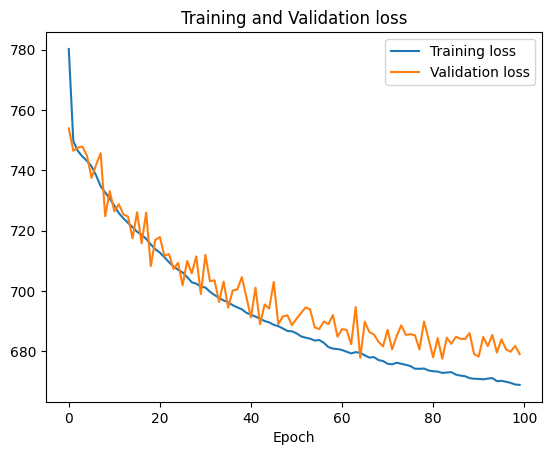

In [12]:
#Compare the training and validation loss

plt.plot(dataset['loss'])
plt.plot(dataset['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='best')

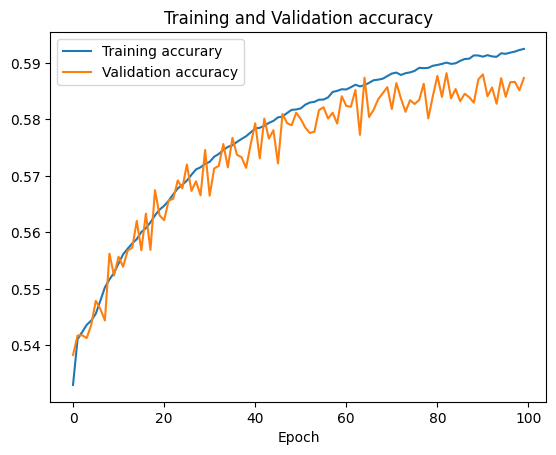

In [13]:
# Comparing the training and validation accuracy

plt.plot(dataset['acc'])
plt.plot(dataset['val_acc'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accurary', 'Validation accuracy'], loc='best')

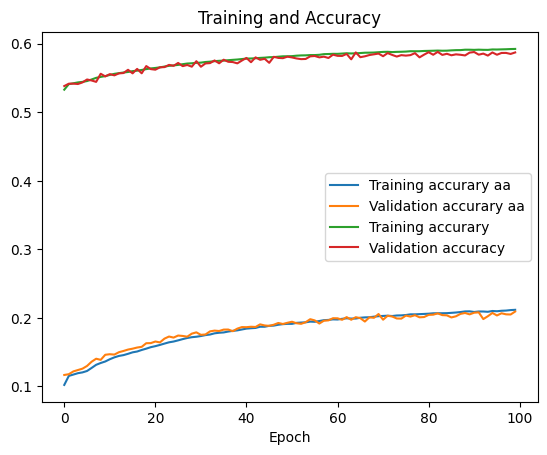

In [5]:
# Comparing the training and validation accuracy for sequence and for wich amino acid

plt.plot(dataset['aa_acc'])
plt.plot(dataset['val_aa_acc'])
plt.plot(dataset['acc'])
plt.plot(dataset['val_acc'])
plt.title('Training and Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accurary aa', 'Validation accurary aa','Training accurary', 'Validation accuracy'], loc='best')